In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/LDS8_K270_ONLINE_DoThiPhuong/LDS8_K270_DoThiPhuong_Cuoi_ky/Cau_8/'

/content/gdrive/My Drive/LDS8_K270_ONLINE_DoThiPhuong/LDS8_K270_DoThiPhuong_Cuoi_ky/Cau_8


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def convertToRGB(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
test1 = cv2.imread('body.jpg')
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

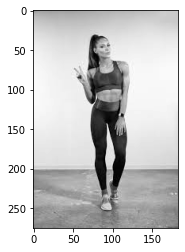

In [7]:
plt.imshow(gray_img, cmap = 'gray')

In [8]:
# load cascade classifier training file for haarcascade
haar_body_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')

In [9]:
bodys = haar_body_cascade.detectMultiScale(gray_img,
                                           scaleFactor = 1.2,
                                           minNeighbors =5
                                        )

In [10]:
print('bodys found: ', len(bodys))

bodys found:  1


In [11]:
# go over list of faces and draw them á rectangles on original colored img
for ( x, y, w, h) in bodys:
  cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 0, 255), 1)

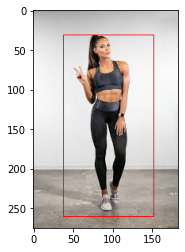

In [12]:
# convert image to RGB and show image
plt.imshow(convertToRGB(test1))

In [13]:
def detect_bodys(b_cascade, colored_img, scaleFactor = 1.2):
    #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY) 

    #let's detect multiscale (some images may be closer to camera than others) images
    bodys = b_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, 
    minNeighbors=5)   
    bodys_found = len(bodys)

    #go over list of bodys and draw them as rectangles on original colored img
    for (x, y, w, h) in bodys:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 1)

    return img_copy, bodys_found

In [14]:
test2 = cv2.imread('body.jpg')
bodys_detected_img, bodys_found = detect_bodys(haar_body_cascade, test2)

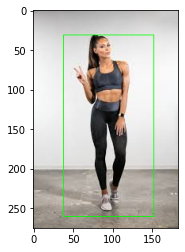

In [15]:
plt.imshow(convertToRGB(bodys_detected_img))

In [16]:
print('Bodys found: ', bodys_found)

Bodys found:  1
